## Quantum Monte Carlo Methods for Risk Analysis in Econophysics

In the field of econophysics, the intersection of economics and physics offers profound insights into complex financial systems. Among the advanced techniques utilized in this domain, Quantum Monte Carlo (QMC) methods stand out as a powerful tool for risk analysis. These methods, rooted in quantum mechanics, provide a sophisticated framework for modeling and understanding the probabilistic nature of financial markets.

Monte Carlo methods have long been a staple in classical finance, where they are used to simulate the behavior of markets and assess risks. However, the quantum version of these methods leverages the principles of quantum superposition and entanglement to explore a much larger space of possible outcomes simultaneously. This is particularly advantageous in risk analysis, where understanding the full spectrum of potential scenarios is crucial for making informed decisions.

Quantum Monte Carlo methods work by encoding financial variables, such as asset prices, interest rates, or market volatility, into quantum states. These states are then evolved according to a quantum algorithm that simulates the dynamics of the market. By sampling from the resulting quantum distribution, we can obtain a more comprehensive understanding of the risks associated with different financial instruments or portfolios. This approach allows for the exploration of scenarios that might be computationally prohibitive using classical methods.

One of the key advantages of using QMC in econophysics is its ability to handle high-dimensional problems with greater efficiency. Financial markets are inherently complex, with many interacting variables that can influence outcomes. Classical Monte Carlo simulations often struggle with the "curse of dimensionality," where the computational cost grows exponentially with the number of variables. Quantum Monte Carlo, on the other hand, can manage these complexities more effectively, providing faster and more accurate risk assessments.

Moreover, QMC methods offer the potential for uncovering hidden correlations and patterns in financial data that might not be apparent through classical analysis. These insights can lead to better strategies for hedging risks and optimizing portfolios. For instance, in scenarios involving extreme market events or black swan occurrences, QMC can provide a more detailed risk profile, helping financial institutions prepare for and mitigate these rare but impactful events.

In the context of econophysics, the application of Quantum Monte Carlo methods represents a significant step forward in our ability to model and manage financial risk. By integrating quantum computing techniques with economic theory, we can develop more robust models that reflect the true complexity of financial markets. This not only enhances our understanding of market dynamics but also provides practical tools for navigating the uncertainties of the financial world.

As quantum computing technology continues to advance, the adoption of Quantum Monte Carlo methods in risk analysis is likely to become more widespread, offering new possibilities for innovation in financial modeling and risk management. For econophysicists, this represents an exciting frontier where the principles of quantum mechanics can be harnessed to address some of the most challenging problems in finance. 

### 1. Probability Amplitude for Quantum States
In quantum mechanics, the state of a system is described by a wave function $ \psi(x) $.

The probability amplitude $ \psi(x) $ gives the likelihood of finding the system in a particular state.



$$
|\psi(x)|^2 = \text{Probability of finding the system at position } x
$$

### 2. Expected Value (Risk Metric)
The expected value $\text{Var}(X)$ of a random variable $X $ , such as a financial asset's value, 
is given by the sum of all possible values weighted by their probabilities.

$$
\langle X \rangle = \sum_i P(x_i) \cdot x_i
$$

### 3. Variance (Risk Metric)
The variance $\text{Var}(X)$ measures the spread of the random variable $X $ around its expected value. 
It is defined as:

$$
\text{Var}(X) = \sum_i P(x_i) \cdot (x_i - \langle X \rangle)^2
$$

### 4. Quantum Fourier Transform (QFT)
The Quantum Fourier Transform is a key operation in many quantum algorithms, including QMC methods. 
For a quantum state \( |x\rangle \), the QFT is defined as:

$$
\text{QFT}|x\rangle = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi i \frac{kx}{N}} |k\rangle
$$

### 5. Hamiltonian for Market Dynamics
The Hamiltonian \( H \) represents the total energy of the system, which in this context 
can be interpreted as a generator of economic dynamics. 
If we consider a simple form of the Hamiltonian, it can be written as:

$$
H = \sum_{i=1}^N \frac{\hat{p}_i^2}{2m_i} + V(\hat{x}_i)
$$

where $ \hat{p}_i $ is the momentum operator, $ m_i $ is the mass (analogous to financial inertia), 
and $ V(\hat{x}_i) $ is the potential energy (analogous to economic potential).


### 6. Time Evolution Operator
The time evolution of a quantum state is governed by the time-dependent Schrödinger equation. 
The time evolution operator \( U(t) \) is defined as:

$$
U(t) = e^{-iHt/\hbar}
$$


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city
from qiskit_aer import AerSimulator, noise
from qiskit.quantum_info import Statevector, partial_trace
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define parameters for the quantum circuit
n_qubits = 4  # Number of qubits representing financial variables
theta_values = np.random.uniform(0, 2 * np.pi, n_qubits)  # Generate random theta values

In [3]:
# Create a Quantum Circuit for the QMC
qc = QuantumCircuit(n_qubits)

In [4]:
# Apply quantum gates to simulate financial variables with entanglement
for i in range(n_qubits):
    qc.h(i)  # Initialize in superposition
    qc.ry(theta_values[i], i)  # Apply rotation gate to simulate market dynamics

In [5]:
# Introduce entanglement using controlled gates
for i in range(n_qubits - 1):
    qc.cx(i, i + 1)  # Apply CNOT gates to entangle qubits

In [6]:
# Apply Quantum Fourier Transform to simulate risk distribution
qc.append(QFT(n_qubits, do_swaps=False), range(n_qubits))

In [7]:
# Inverse QFT (for completeness)
qc.append(QFT(n_qubits, do_swaps=False).inverse(), range(n_qubits))

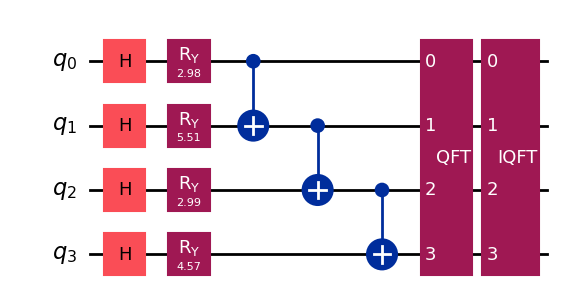

In [8]:
# Visualize circuit
qc.draw('mpl')
plt.show()

In [9]:
# Simulate the statevector (without measurement)
statevector = Statevector.from_instruction(qc)

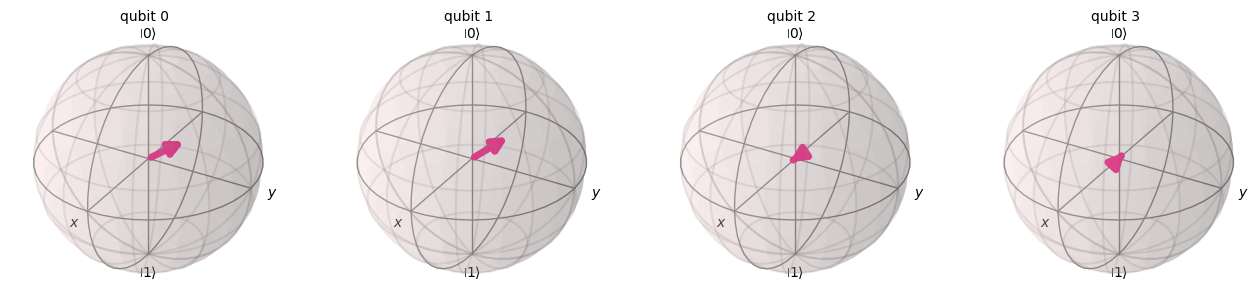

In [10]:
# Visualize the Bloch spheres of the final state
plot_bloch_multivector(statevector)
plt.show()

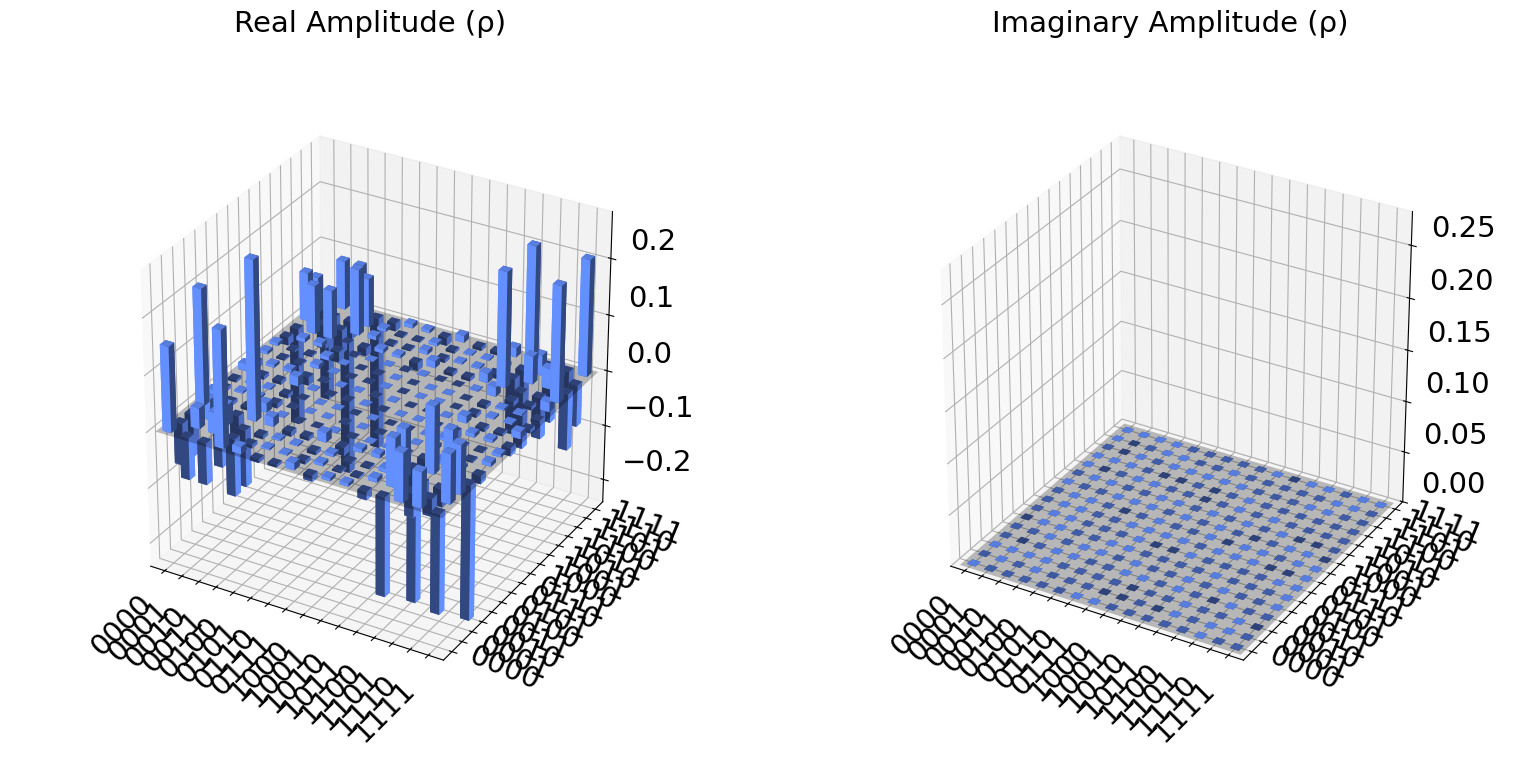

In [11]:
# Advanced visualization: State city plot
plot_state_city(statevector)
plt.show()

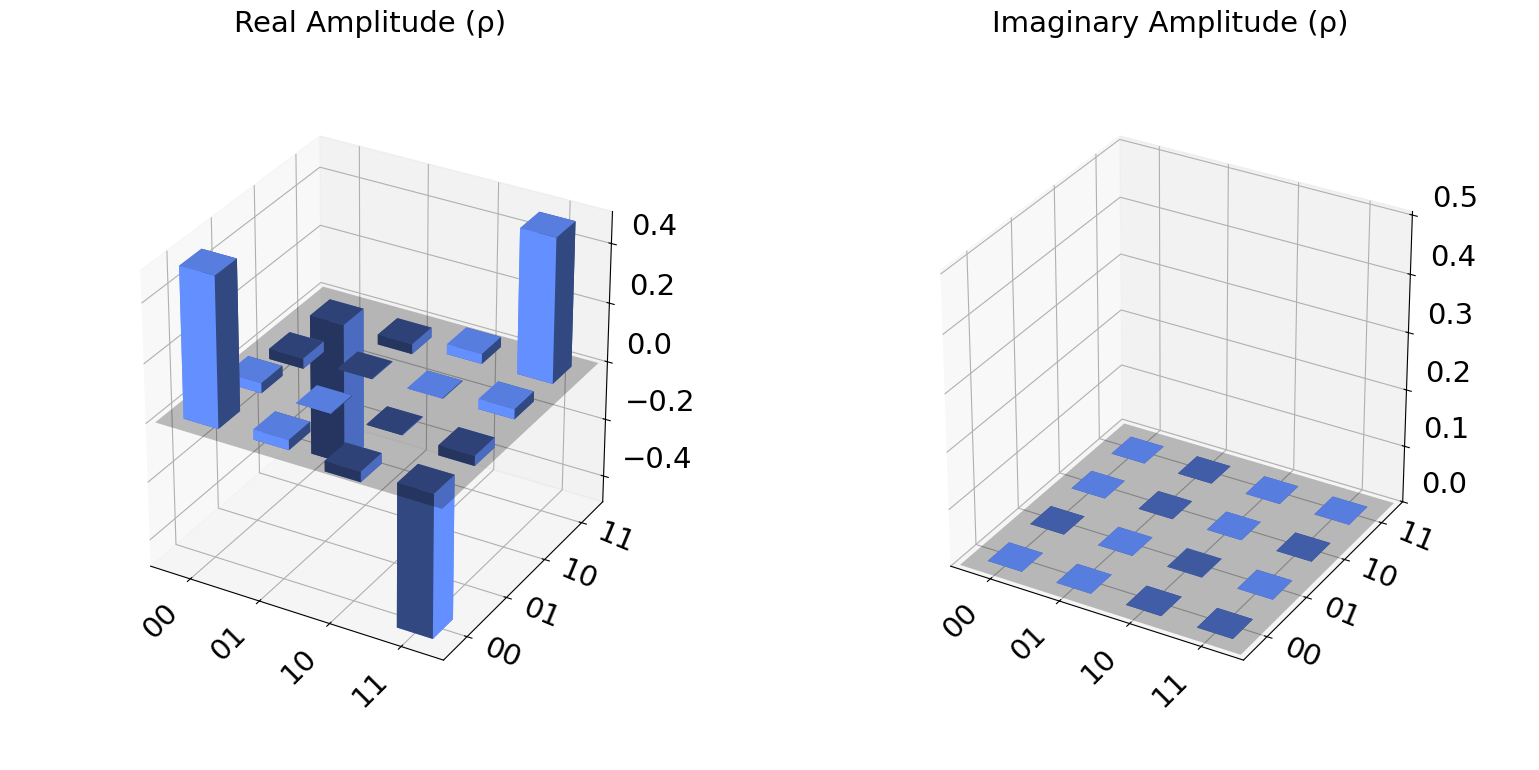

In [12]:
# Partial trace to examine subsystems (for more complex economic analysis)
subsystem_trace = partial_trace(statevector, [0, 1])
plot_state_city(subsystem_trace)
plt.show()

In [13]:
# Now, add measurement for the final simulation with AerSimulator
qc.measure_all()

In [14]:
# Initialize simulator for transpilation
simulator = AerSimulator()

In [ ]:
# Adding a realistic noise model to the simulator
noise_model = noise.NoiseModel()
error_rate = 0.01
for qubit in range(n_qubits):
    noise_model.add_all_qubit_quantum_error(noise.depolarizing_error(error_rate, 1), ['ry'])
    noise_model.add_all_qubit_quantum_error(noise.depolarizing_error(error_rate, 2), ['cx'])

qc_transpiled = transpile(qc, simulator)

In [16]:
# Simulate the circuit with noise and measurement
result = simulator.run(qc_transpiled, noise_model=noise_model).result()
counts = result.get_counts()

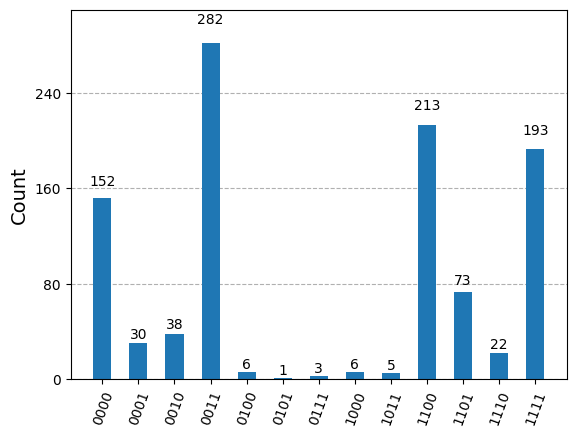

In [17]:
# Display the results as a histogram
plot_histogram(counts)
plt.show()

In [18]:
# Calculate expectation values or risk metrics
expected_value = sum([int(state, 2) * count for state, count in counts.items()]) / sum(counts.values())
print(f'Expected Value (Risk Metric): {expected_value}')

Expected Value (Risk Metric): 7.6298828125


In [19]:
# Adding a more complex risk metric: variance
variance = sum([(int(state, 2) - expected_value) ** 2 * count for state, count in counts.items()]) / sum(counts.values())
print(f'Variance (Risk Metric): {variance}')

Variance (Risk Metric): 34.28781795501709
